### Package Imports

In [1]:
import numpy as np 
import pandas as pd
import os
import seaborn as sns
import json
#Plotting
import matplotlib.pyplot as plt
#Statistical fitting of models
import statsmodels.api as sm
import statsmodels.formula.api as smf
import time
import pathlib

### Wyscout Data Dictionary

id: a unique identifier of the event

eventID: the identifier of the event's type. Each eventId is associated with an event.

eventName: name of the event's type

subEventId: the identifier of the subevent's type. Each subEventId is associated with a subevent name

subEventName: the name of the subevent's type. Each event type is associated with a different set of subevent types.

The specific details of the above three vaariables are present in the file "/kaggle/input/football-event- data/eventid2name.csv"
eventSec: the time when the event occurs (in seconds since the beginning of the current half of the match)

tags: a list of event tags, each one describes additional information about the event (e.g., accurate). Each event type is associated with a different set of tags. Details of tag and associaetd labels and descriptions is given in the file "/kaggle/input/football-event-data/tags2name.csv"

playerID: the identifier of the player who generated the event

positions: the origin and destination positions associated with the event. Each position is a pair of coordinates (x, y). The x and y coordinates are always in the range [0, 100] and indicate the percentage of the field from the perspective of the attacking team. In particular, the value of the x coordinate indicates the event's nearness (in percentage) to the opponent's goal, while the value of the y coordinates indicates the event's nearness (in percentage) to the right side of the field

matchId: the identifier of the match the event refers to

teamId: the identifier of the player's team

matchPeriod: the period of the match. It can be "1H" (first half of the match), "2H" (second half of the match), "E1" (first extra time), "E2" (second extra time) or "P" (penalties time)

### Data Loading

In [2]:
file_name = 'events_England' + '.json'
path = os.path.join(str(pathlib.Path().resolve().parents[0]), 'data', 'Wyscout', file_name)
with open(path) as f:
    data_England = json.load(f)

# Converting the laoded into datframe
event_England = pd.DataFrame(data_England)

event_England

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",2499719,Pass,1609,1H,2.758649,85,177959171
1,8,High pass,[{'id': 1801}],370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",2499719,Pass,1609,1H,4.946850,83,177959172
2,8,Head pass,[{'id': 1801}],3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",2499719,Pass,1609,1H,6.542188,82,177959173
3,8,Head pass,[{'id': 1801}],120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",2499719,Pass,1609,1H,8.143395,82,177959174
4,8,Simple pass,[{'id': 1801}],167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",2499719,Pass,1609,1H,10.302366,85,177959175
...,...,...,...,...,...,...,...,...,...,...,...,...
643145,5,Ball out of the field,[],0,"[{'y': 32, 'x': 0}, {'y': 100, 'x': 100}]",2500098,Interruption,1623,2H,2796.732525,50,251596409
643146,3,Corner,"[{'id': 302}, {'id': 801}, {'id': 1801}]",70965,"[{'y': 100, 'x': 100}, {'y': 47, 'x': 88}]",2500098,Free Kick,1633,2H,2829.821084,30,251596232
643147,1,Air duel,"[{'id': 701}, {'id': 1802}]",7919,"[{'y': 53, 'x': 12}, {'y': 50, 'x': 14}]",2500098,Duel,1623,2H,2831.211419,10,251596410
643148,1,Air duel,"[{'id': 703}, {'id': 1801}]",8005,"[{'y': 47, 'x': 88}, {'y': 50, 'x': 86}]",2500098,Duel,1633,2H,2832.434399,10,251596234


In [3]:
file_name = 'players' + '.json'
path = os.path.join(str(pathlib.Path().resolve().parents[0]), 'data', 'Wyscout', file_name)
with open(path) as f:
    data_players = json.load(f)

# Converting the laoded into datframe
players_df = pd.DataFrame(data_players)

players_df

,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,wyId,foot,shortName,currentNationalTeamId
0,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...",78,Harun,,Tekin,4502,1989-06-17,187,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Turkey', 'id': '792', 'alpha3code': ...",32777,right,H. Tekin,4687
1,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",73,Malang,,Sarr,3775,1999-01-23,182,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393228,left,M. Sarr,4423
2,"{'name': 'France', 'id': '250', 'alpha3code': ...",72,Over,,Mandanda,3772,1998-10-26,176,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'France', 'id': '250', 'alpha3code': ...",393230,,O. Mandanda,null
3,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",82,Alfred John Momar,,N'Diaye,683,1990-03-06,187,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'France', 'id': '250', 'alpha3code': ...",32793,right,A. N'Diaye,19314
4,"{'name': 'France', 'id': '250', 'alpha3code': ...",84,Ibrahima,,Konat\u00e9,2975,1999-05-25,192,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",393247,right,I. Konat\u00e9,null
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3598,"{'name': 'Tunisia', 'id': 788, 'alpha3code': '...",72,Ali,,Ma\u00e2loul,16041,1990-01-01,175,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'Tunisia', 'id': 788, 'alpha3code': '...",120839,left,A. Ma\u00e2loul,null
3599,"{'name': 'Peru', 'id': 604, 'alpha3code': 'PER...",76,Carlos Alberto,,C\u00e1ceda Oyaguez,15591,1991-09-27,183,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Peru', 'id': 604, 'alpha3code': 'PER...",114736,right,C. C\u00e1ceda,null
3600,"{'name': 'Peru', 'id': 604, 'alpha3code': 'PER...",78,Miguel Gianpierre,,Araujo Blanco,12072,1994-10-24,179,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'Peru', 'id': 604, 'alpha3code': 'PER...",114908,right,M. Araujo,null
3601,"{'name': 'Morocco', 'id': 504, 'alpha3code': '...",70,Ahmed Reda,,Tagnaouti,16183,1996-04-05,182,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Morocco', 'id': 504, 'alpha3code': '...",285583,right,A. Tagnaouti,null


In [4]:
file_name = 'matches_England' + '.json'
path = os.path.join(str(pathlib.Path().resolve().parents[0]), 'data', 'Wyscout', file_name)
with open(path) as f:
    matches_England = json.load(f)

# Converting the laoded into datframe
matches_England_df = pd.DataFrame(matches_England)

matches_England_df.head(5)

,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,referees,duration,competitionId
0,Played,4405654,38,"{'1646': {'scoreET': 0, 'coachId': 8880, 'side...",181150,2018-05-13 14:00:00,1659,Turf Moor,2500089,"Burnley - AFC Bournemouth, 1 - 2","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 385705, 'role': 'referee'}, {'r...",Regular,364
1,Played,4405654,38,"{'1628': {'scoreET': 0, 'coachId': 8357, 'side...",181150,2018-05-13 14:00:00,1628,Selhurst Park,2500090,"Crystal Palace - West Bromwich Albion, 2 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 381851, 'role': 'referee'}, {'r...",Regular,364
2,Played,4405654,38,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",181150,2018-05-13 14:00:00,1609,The John Smith's Stadium,2500091,"Huddersfield Town - Arsenal, 0 - 1","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 384965, 'role': 'referee'}, {'r...",Regular,364
3,Played,4405654,38,"{'1651': {'scoreET': 0, 'coachId': 8093, 'side...",181150,2018-05-13 14:00:00,1612,Anfield,2500092,"Liverpool - Brighton & Hove Albion, 4 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 385704, 'role': 'referee'}, {'r...",Regular,364
4,Played,4405654,38,"{'1644': {'scoreET': 0, 'coachId': 93112, 'sid...",181150,2018-05-13 14:00:00,1611,Old Trafford,2500093,"Manchester United - Watford, 1 - 0","May 13, 2018 at 4:00:00 PM GMT+2","[{'refereeId': 381853, 'role': 'referee'}, {'r...",Regular,364


In [5]:
event_match_data_merged = pd.merge(event_England, matches_England_df, 
                             left_on = ['matchId'], right_on = ['wyId'],
                             how = 'left')

event_match_data_merged = pd.merge(event_match_data_merged, players_df, left_on = ['playerId'], right_on = ['wyId'], how = 'left')

event_match_data_merged.columns

Index(['eventId', 'subEventName', 'tags', 'playerId', 'positions', 'matchId',
       'eventName', 'teamId', 'matchPeriod', 'eventSec', 'subEventId', 'id',
       'status', 'roundId', 'gameweek', 'teamsData', 'seasonId', 'dateutc',
       'winner', 'venue', 'wyId_x', 'label', 'date', 'referees', 'duration',
       'competitionId', 'passportArea', 'weight', 'firstName', 'middleName',
       'lastName', 'currentTeamId', 'birthDate', 'height', 'role', 'birthArea',
       'wyId_y', 'foot', 'shortName', 'currentNationalTeamId'],
      dtype='object')

In [6]:
# Filtering out all the shots from our dataset
shots_df = event_match_data_merged[event_match_data_merged['subEventName']=='Shot'].reset_index(drop=True)

shots_df.head(5)

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,...,lastName,currentTeamId,birthDate,height,role,birthArea,wyId_y,foot,shortName,currentNationalTeamId
0,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",25413,"[{'y': 41, 'x': 88}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,94.595788,...,Lacazette,1609,1991-05-28,175.0,"{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...","{'name': 'France', 'id': 250, 'alpha3code': 'F...",25413.0,right,A. Lacazette,null
1,10,Shot,"[{'id': 401}, {'id': 201}, {'id': 1211}, {'id'...",26150,"[{'y': 52, 'x': 85}, {'y': 100, 'x': 100}]",2499719,Shot,1631,1H,179.854785,...,Mahrez,1625,1991-02-21,179.0,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'France', 'id': 250, 'alpha3code': 'F...",26150.0,left,R. Mahrez,16009
2,10,Shot,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",14763,"[{'y': 52, 'x': 96}, {'y': 100, 'x': 100}]",2499719,Shot,1631,1H,254.745027,...,Okazaki,1631,1986-04-16,174.0,"{'code2': 'FW', 'code3': 'FWD', 'name': 'Forwa...","{'name': 'Japan', 'id': '392', 'alpha3code': '...",14763.0,right,S. Okazaki,12913
3,10,Shot,"[{'id': 401}, {'id': 201}, {'id': 1215}, {'id'...",7868,"[{'y': 33, 'x': 81}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,425.824035,...,Oxlade-Chamberlain,1612,1993-08-15,175.0,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'England', 'id': 0, 'alpha3code': 'XE...",7868.0,right,A. Oxlade-Chamberlain,null
4,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1205}, {'id'...",7868,"[{'y': 30, 'x': 75}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,815.462015,...,Oxlade-Chamberlain,1612,1993-08-15,175.0,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'England', 'id': 0, 'alpha3code': 'XE...",7868.0,right,A. Oxlade-Chamberlain,null


### Feature Engineering

#### Adding features to our dataset

Adding More Features to our Dataset
We will be adding the following features to our data set

Tag Description

401 Left foot

402 Right foot

1201 Position: Goal low center

1202 Position: Goal low right

1203 Position: Goal center

1204 Position: Goal center left

1205 Position: Goal low left

1206 Position: Goal center right

1207 Position: Goal high center

1208 Position: Goal high left

1209 Position: Goal high right

In [7]:
left_foot = [] # Left-Footed Shots: 401
right_foot = [] # Right_Footed Shots: 402
glc = [] # Goal Low Center: 1201
glr = [] # Goal Low Right: 1202
gll = [] # Goal Low Left : 1205
gc = [] # Goal Center : 1203
gcl = [] # Goal Center Left: 1204
gcr = [] # Goal Center Right: 1206
ghc = [] # Goal High Center: 1207
ghr = [] # Goal High Right: 1209
ghl = [] # Goal High Left: 1208


row_number = 0
row_list = []
for tag in shots_df['tags']:
    
    for pair in tag:
        if pair['id'] == 403:
            row_list.append('Header_row')
        if pair['id'] != 403:
        
            if pair['id'] == 401:
                left_foot.append([row_number, 1])
            elif pair['id'] == 402:
                right_foot.append([row_number, 1])
            elif pair['id'] == 1201:
                glc.append([row_number, 1])
            elif pair['id'] == 1202:
                glr.append([row_number, 1])
            elif pair['id'] == 1203:
                gc.append([row_number, 1])
            elif pair['id'] == 1204:
                gcl.append([row_number, 1])
            elif pair['id'] == 1205:
                gll.append([row_number, 1])
            elif pair['id'] == 1206:
                gcr.append([row_number, 1])
            elif pair['id'] == 1207:
                ghc.append([row_number, 1])
            elif pair['id'] == 1208:
                ghl.append([row_number, 1])
            elif pair['id'] == 1209:
                ghr.append([row_number, 1])
                      
        
    row_number += 1

In [8]:
# Creating dataframes
left_foot_df = pd.DataFrame(left_foot)
left_foot_df.columns = ['index','Left_Foot']

right_foot_df = pd.DataFrame(right_foot)
right_foot_df.columns = ['index','Right_Foot']

glc_df = pd.DataFrame(glc)
glc_df.columns = ['index','GLC']

glr_df = pd.DataFrame(glr)
glr_df.columns = ['index','GLR']

gll_df = pd.DataFrame(gll)
gll_df.columns = ['index','GLL']

gc_df = pd.DataFrame(gc)
gc_df.columns = ['index','GC']

gcl_df = pd.DataFrame(gcl)
gcl_df.columns = ['index','GCL']

gcr_df = pd.DataFrame(gcr)
gcr_df.columns = ['index','GCR']

ghc_df = pd.DataFrame(ghc)
ghc_df.columns = ['index','GHC']

ghr_df = pd.DataFrame(ghr)
ghr_df.columns = ['index','GHR']

ghl_df = pd.DataFrame(ghl)
ghl_df.columns = ['index','GHL']

In [9]:
# concatenate all dataframes vertically
df_all = pd.concat([left_foot_df.set_index('index'), right_foot_df.set_index('index'), 
                    glc_df.set_index('index'), glr_df.set_index('index'), gll_df.set_index('index'), 
                    gc_df.set_index('index'), gcl_df.set_index('index'), gcr_df.set_index('index'), 
                    ghc_df.set_index('index'), ghr_df.set_index('index'), ghl_df.set_index('index')], axis=1)



# merge all dataframes based on index of df_A and index column of other dataframes
final_df = pd.merge(shots_df, df_all, left_index=True, right_index=True, how = 'left')

# fill all NaN values with 0
final_df = final_df.fillna(0)

# display the modified dataframe
final_df.head(5)

/var/folders/ch/rtlgfpts12v22kcr_b8ncvqr0000gn/T/ipykernel_58851/3197724462.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_df = final_df.fillna(0)


,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,...,Right_Foot,GLC,GLR,GLL,GC,GCL,GCR,GHC,GHR,GHL
0,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",25413,"[{'y': 41, 'x': 88}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,94.595788,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10,Shot,"[{'id': 401}, {'id': 201}, {'id': 1211}, {'id'...",26150,"[{'y': 52, 'x': 85}, {'y': 100, 'x': 100}]",2499719,Shot,1631,1H,179.854785,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10,Shot,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",14763,"[{'y': 52, 'x': 96}, {'y': 100, 'x': 100}]",2499719,Shot,1631,1H,254.745027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,10,Shot,"[{'id': 401}, {'id': 201}, {'id': 1215}, {'id'...",7868,"[{'y': 33, 'x': 81}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,425.824035,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1205}, {'id'...",7868,"[{'y': 30, 'x': 75}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,815.462015,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Features Selected

1. X, Y Coordinates of Shot

2. Angle of Shot from Goal

3. Foot Used for Shooting (Left or Right Foot, Header are excluded from this study)

4. Position of Shot in the Goal (Low left, Low right, Low center etc)

5. Match Half in which the shot occured (1st half or 2nd half)


Keep in mind the description of position column. The x and y coordinates are always in the range [0, 100] and indicate the percentage of the field from the perspective of the attacking team. In particular, the value of the x coordinate indicates the event's nearness (in percentage) to the opponent's goal, while the value of the y coordinates indicates the event's nearness (in percentage) to the right side of the field. So to get the actual X and Y coordinates, distance and angle from goal, we need certain transformations.

In [10]:
# Let us build the required dataset for expected goal model building
# Creating your feature matrix and dropping non-essential columns
shots_model=pd.DataFrame(columns=['Goal','X','Y','Match_Period',
                                  'Left_Foot', 'Right_Foot',
                                  'GLC','GLR','GLL','GC','GCR','GCL','GHC','GHR','GHL'])


#Go through the dataframe, calculate X, Y co-ordinates, angle and fetch the remaining features 

for i,shot in final_df.iterrows():
    
    header=0
    for shottags in shot['tags']:
        if shottags['id']==403:
            header=1
    #Only include non-headers        
    if not(header):
        #In Wyscout data, coordinates are usually expressed as a percentage of the field dimensions:
        #x: 0 to 100, where 0 is one goal line and 100 is the other goal line.
        #y: 0 to 100, where 0 is the left sideline and 100 is the right sideline.

        #The x-coordinate is flipped (subtracted from 100), likely because you want all the shots to be plotted from the perspective 
        #of the attacking team, regardless of which half of the field they are shooting from.
        
        shots_model.at[i,'X']=100-shot['positions'][0]['x']
        shots_model.at[i,'Y']=shot['positions'][0]['y']

        #This computes the absolute distance from the centerline of the field (y = 50).
        #This is useful for calculating how central or wide the shot is, which could be important for analysis (e.g., shots from central
        #positions vs. wide positions). It helps to quantify the horizontal distance from the central axis of the field.
        
        shots_model.at[i,'C']=abs(shot['positions'][0]['y']-50)
    
        #Distance in metres and shot angle in radians.
        x=shots_model.at[i,'X']*105/100
        y=shots_model.at[i,'C']*65/100
        shots_model.at[i,'Distance']=np.sqrt(x**2 + y**2)
        a = np.arctan( 7.32 *x /(x**2 + y**2 - (7.32/2)**2))
        if a<0:
            a=np.pi+a
        shots_model.at[i,'Angle'] =a
    
        #Was it a goal
        shots_model.at[i,'Goal']=0
        for shottags in shot['tags']:
                #Tags contain that its a goal
                if shottags['id']==101:
                    shots_model.at[i,'Goal']=1
        # Adding the player rank
        #shots_model.at[i,'Player_Rank'] = shot['playerankScore']
        
        # Adding match half
        shots_model.at[i,'Match_Period'] = shot['matchPeriod']
        
        # Adding one hot encoded features related to foot used for shooting and position of shot w.r.t goal
        shots_model.at[i,'Left_Foot']  = shot['Left_Foot']
        shots_model.at[i,'Right_Foot'] = shot['Right_Foot']
        shots_model.at[i,'GLC']        = shot['GLC']
        shots_model.at[i,'GLR']        = shot['GLR']
        shots_model.at[i,'GLL']        = shot['GLL']
        shots_model.at[i,'GC']         = shot['GC']
        shots_model.at[i,'GCL']        = shot['GCL']
        shots_model.at[i,'GCR']        = shot['GCR']
        shots_model.at[i,'GHC']        = shot['GHC']
        shots_model.at[i,'GHL']        = shot['GHL']
        shots_model.at[i,'GHR']        = shot['GHR']
        
# Let's see our finalized data set
shots_model

,Goal,X,Y,Match_Period,Left_Foot,Right_Foot,GLC,GLR,GLL,GC,GCR,GCL,GHC,GHR,GHL,C,Distance,Angle
0,1,12,41,1H,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,13.891814,0.474451
1,0,15,52,1H,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,15.803560,0.453823
3,0,19,33,1H,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,22.805811,0.280597
4,0,25,30,1H,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,29.292704,0.223680
5,0,10,39,1H,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,12.703248,0.479051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8445,0,14,40,2H,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,16.072959,0.413920
8446,0,28,45,2H,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,29.579089,0.244789
8447,1,14,33,2H,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,17.0,18.390011,0.319916
8448,0,12,62,2H,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,14.818907,0.420593


In [11]:
# The angle calulcated is in radians. Let us first convert all the angles in degrees
def rad_deg(x):
    return np.rad2deg(x)

# Calling our function to achieve conversion
shots_model['Angle'] = shots_model['Angle'].apply(rad_deg)

In [12]:
# Match_Period is a categorical variable. So we will perform one-hot encoding for the column

# perform one-hot encoding for Match_Period column
one_hot = pd.get_dummies(shots_model['Match_Period'])

#merge one-hot encoded columns back with original DataFrame
shots_model = pd.concat([shots_model, one_hot], axis=1)

#drop the original 'Match_Period' column
shots_model.drop('Match_Period', axis=1, inplace=True)

# Resetting the index of the dataframe
shots_model = shots_model.reset_index(drop=True)

# Finalized dataframe
shots_model

,Goal,X,Y,Left_Foot,Right_Foot,GLC,GLR,GLL,GC,GCR,GCL,GHC,GHR,GHL,C,Distance,Angle,1H,2H
0,1,12,41,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,13.891814,27.184065,True,False
1,0,15,52,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,15.803560,26.002161,True,False
2,0,19,33,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,22.805811,16.077018,True,False
3,0,25,30,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,29.292704,12.815892,True,False
4,0,10,39,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,12.703248,27.447608,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7129,0,14,40,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,16.072959,23.715869,False,True
7130,0,28,45,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,29.579089,14.025369,False,True
7131,1,14,33,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,17.0,18.390011,18.329841,False,True
7132,0,12,62,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,14.818907,24.098221,False,True


In [13]:
# Correcting the data types of columns
# Changing all the one-hot encoded columns into integers
# Changing data type of Player_Rank column to float

shots_model = shots_model.astype({'X': float, 'Y': float, 'Goal': int, 'Left_Foot': int, 'Right_Foot': int ,'GLC': int, 'GLR': int, 
                                  'GLL': int, 'GC': int, 'GCR': int, 'GCL': int, 'GHC': int, 'GHR': int, 
                                  'GHL' : int, '1H': int, '2H': int})

# Again checking our datatypes
shots_model.dtypes

Goal            int64
X             float64
Y             float64
Left_Foot       int64
Right_Foot      int64
GLC             int64
GLR             int64
GLL             int64
GC              int64
GCR             int64
GCL             int64
GHC             int64
GHR             int64
GHL             int64
C             float64
Distance      float64
Angle         float64
1H              int64
2H              int64
dtype: object

In [14]:
from matplotlib.patches import Arc
def createPitch(length,width, unity,linecolor): # in meters
    
    """
    creates a plot in which the 'length' is the length of the pitch (goal to goal).
    And 'width' is the width of the pitch (sideline to sideline). 
    Fill in the unity in meters or in yards.
    """
    #Set unity
    if unity == "meters":
        # Set boundaries
        if length >= 120.5 or width >= 75.5:
            return(str("Field dimensions are too big for meters as unity, didn't you mean yards as unity?\
                       Otherwise the maximum length is 120 meters and the maximum width is 75 meters. Please try again"))
        #Run program if unity and boundaries are accepted
        else:
            #Create figure
            fig=plt.figure()
            #fig.set_size_inches(7, 5)
            ax=fig.add_subplot(1,1,1)
           
            #Pitch Outline & Centre Line
            plt.plot([0,0],[0,width], color=linecolor)
            plt.plot([0,length],[width,width], color=linecolor)
            plt.plot([length,length],[width,0], color=linecolor)
            plt.plot([length,0],[0,0], color=linecolor)
            plt.plot([length/2,length/2],[0,width], color=linecolor)
            
            #Left Penalty Area
            plt.plot([16.5 ,16.5],[(width/2 +16.5),(width/2-16.5)],color=linecolor)
            plt.plot([0,16.5],[(width/2 +16.5),(width/2 +16.5)],color=linecolor)
            plt.plot([16.5,0],[(width/2 -16.5),(width/2 -16.5)],color=linecolor)
            
            #Right Penalty Area
            plt.plot([(length-16.5),length],[(width/2 +16.5),(width/2 +16.5)],color=linecolor)
            plt.plot([(length-16.5), (length-16.5)],[(width/2 +16.5),(width/2-16.5)],color=linecolor)
            plt.plot([(length-16.5),length],[(width/2 -16.5),(width/2 -16.5)],color=linecolor)
            
            #Left 5-meters Box
            plt.plot([0,5.5],[(width/2+7.32/2+5.5),(width/2+7.32/2+5.5)],color=linecolor)
            plt.plot([5.5,5.5],[(width/2+7.32/2+5.5),(width/2-7.32/2-5.5)],color=linecolor)
            plt.plot([5.5,0.5],[(width/2-7.32/2-5.5),(width/2-7.32/2-5.5)],color=linecolor)
            
            #Right 5 -eters Box
            plt.plot([length,length-5.5],[(width/2+7.32/2+5.5),(width/2+7.32/2+5.5)],color=linecolor)
            plt.plot([length-5.5,length-5.5],[(width/2+7.32/2+5.5),width/2-7.32/2-5.5],color=linecolor)
            plt.plot([length-5.5,length],[width/2-7.32/2-5.5,width/2-7.32/2-5.5],color=linecolor)
            
            #Prepare Circles
            centreCircle = plt.Circle((length/2,width/2),9.15,color=linecolor,fill=False)
            centreSpot = plt.Circle((length/2,width/2),0.8,color=linecolor)
            leftPenSpot = plt.Circle((11,width/2),0.8,color=linecolor)
            rightPenSpot = plt.Circle((length-11,width/2),0.8,color=linecolor)
            
            #Draw Circles
            ax.add_patch(centreCircle)
            ax.add_patch(centreSpot)
            ax.add_patch(leftPenSpot)
            ax.add_patch(rightPenSpot)
            
            #Prepare Arcs
            leftArc = Arc((11,width/2),height=18.3,width=18.3,angle=0,theta1=308,theta2=52,color=linecolor)
            rightArc = Arc((length-11,width/2),height=18.3,width=18.3,angle=0,theta1=128,theta2=232,color=linecolor)
            
            #Draw Arcs
            ax.add_patch(leftArc)
            ax.add_patch(rightArc)
            #Axis titles

    #check unity again
    elif unity == "yards":
        #check boundaries again
        if length <= 95:
            return(str("Didn't you mean meters as unity?"))
        elif length >= 131 or width >= 101:
            return(str("Field dimensions are too big. Maximum length is 130, maximum width is 100"))
        #Run program if unity and boundaries are accepted
        else:
            #Create figure
            fig=plt.figure()
            #fig.set_size_inches(7, 5)
            ax=fig.add_subplot(1,1,1)
           
            #Pitch Outline & Centre Line
            plt.plot([0,0],[0,width], color=linecolor)
            plt.plot([0,length],[width,width], color=linecolor)
            plt.plot([length,length],[width,0], color=linecolor)
            plt.plot([length,0],[0,0], color=linecolor)
            plt.plot([length/2,length/2],[0,width], color=linecolor)
            
            #Left Penalty Area
            plt.plot([18 ,18],[(width/2 +18),(width/2-18)],color=linecolor)
            plt.plot([0,18],[(width/2 +18),(width/2 +18)],color=linecolor)
            plt.plot([18,0],[(width/2 -18),(width/2 -18)],color=linecolor)
            
            #Right Penalty Area
            plt.plot([(length-18),length],[(width/2 +18),(width/2 +18)],color=linecolor)
            plt.plot([(length-18), (length-18)],[(width/2 +18),(width/2-18)],color=linecolor)
            plt.plot([(length-18),length],[(width/2 -18),(width/2 -18)],color=linecolor)
            
            #Left 6-yard Box
            plt.plot([0,6],[(width/2+7.32/2+6),(width/2+7.32/2+6)],color=linecolor)
            plt.plot([6,6],[(width/2+7.32/2+6),(width/2-7.32/2-6)],color=linecolor)
            plt.plot([6,0],[(width/2-7.32/2-6),(width/2-7.32/2-6)],color=linecolor)
            
            #Right 6-yard Box
            plt.plot([length,length-6],[(width/2+7.32/2+6),(width/2+7.32/2+6)],color=linecolor)
            plt.plot([length-6,length-6],[(width/2+7.32/2+6),width/2-7.32/2-6],color=linecolor)
            plt.plot([length-6,length],[(width/2-7.32/2-6),width/2-7.32/2-6],color=linecolor)
            
            #Prepare Circles; 10 yards distance. penalty on 12 yards
            centreCircle = plt.Circle((length/2,width/2),10,color=linecolor,fill=False)
            centreSpot = plt.Circle((length/2,width/2),0.8,color=linecolor)
            leftPenSpot = plt.Circle((12,width/2),0.8,color=linecolor)
            rightPenSpot = plt.Circle((length-12,width/2),0.8,color=linecolor)
            
            #Draw Circles
            ax.add_patch(centreCircle)
            ax.add_patch(centreSpot)
            ax.add_patch(leftPenSpot)
            ax.add_patch(rightPenSpot)
            
            #Prepare Arcs
            leftArc = Arc((11,width/2),height=20,width=20,angle=0,theta1=312,theta2=48,color=linecolor)
            rightArc = Arc((length-11,width/2),height=20,width=20,angle=0,theta1=130,theta2=230,color=linecolor)
            
            #Draw Arcs
            ax.add_patch(leftArc)
            ax.add_patch(rightArc)
                
    #Tidy Axes
    plt.axis('off')
    
    return fig,ax


def createPitchOld():
            
    #Create figure
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)

    #Pitch Outline & Centre Line
    plt.plot([0,0],[0,90], color=linecolor)
    plt.plot([0,130],[90,90], color=linecolor)
    plt.plot([130,130],[90,0], color=linecolor)
    plt.plot([130,0],[0,0], color=linecolor)
    plt.plot([65,65],[0,90], color=linecolor)
    
    #Left Penalty Area
    plt.plot([16.5,16.5],[65,25],color=linecolor)
    plt.plot([0,16.5],[65,65],color=linecolor)
    plt.plot([16.5,0],[25,25],color=linecolor)
    
    #Right Penalty Area
    plt.plot([130,113.5],[65,65],color=linecolor)
    plt.plot([113.5,113.5],[65,25],color=linecolor)
    plt.plot([113.5,130],[25,25],color=linecolor)
    
    #Left 6-yard Box
    plt.plot([0,5.5],[54,54],color=linecolor)
    plt.plot([5.5,5.5],[54,36],color=linecolor)
    plt.plot([5.5,0.5],[36,36],color=linecolor)
    
    #Right 6-yard Box
    plt.plot([130,124.5],[54,54],color=linecolor)
    plt.plot([124.5,124.5],[54,36],color=linecolor)
    plt.plot([124.5,130],[36,36],color=linecolor)
    
    #Prepare Circles
    centreCircle = plt.Circle((65,45),9.15,color=linecolor,fill=False)
    centreSpot = plt.Circle((65,45),0.8,color=linecolor)
    leftPenSpot = plt.Circle((11,45),0.8,color=linecolor)
    rightPenSpot = plt.Circle((119,45),0.8,color=linecolor)
    
    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)
    
    #Prepare Arcs
    leftArc = Arc((11,45),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color=linecolor)
    rightArc = Arc((119,45),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color=linecolor)

    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)
    
    #Tidy Axes
    plt.axis('off')
    
    return fig,ax

def createGoalMouth():
    
    #Create figure
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)

    linecolor='black'

    #Pitch Outline & Centre Line
    plt.plot([0,65],[0,0], color=linecolor)
    plt.plot([65,65],[50,0], color=linecolor)
    plt.plot([0,0],[50,0], color=linecolor)
    
    #Left Penalty Area
    plt.plot([12.5,52.5],[16.5,16.5],color=linecolor)
    plt.plot([52.5,52.5],[16.5,0],color=linecolor)
    plt.plot([12.5,12.5],[0,16.5],color=linecolor)
    
    #Left 6-yard Box
    plt.plot([41.5,41.5],[5.5,0],color=linecolor)
    plt.plot([23.5,41.5],[5.5,5.5],color=linecolor)
    plt.plot([23.5,23.5],[0,5.5],color=linecolor)
    
    #Goal
    plt.plot([41.5-5.34,41.5-5.34],[-2,0],color=linecolor)
    plt.plot([23.5+5.34,41.5-5.34],[-2,-2],color=linecolor)
    plt.plot([23.5+5.34,23.5+5.34],[0,-2],color=linecolor)
    
    #Prepare Circles
    leftPenSpot = plt.Circle((65/2,11),0.8,color=linecolor)
    
    #Draw Circles
    ax.add_patch(leftPenSpot)
    
    #Prepare Arcs
    leftArc = Arc((32.5,11),height=18.3,width=18.3,angle=0,theta1=38,theta2=142,color=linecolor)
    
    #Draw Arcs
    ax.add_patch(leftArc)
    
    #Tidy Axes
    plt.axis('off')
    
    return fig,ax

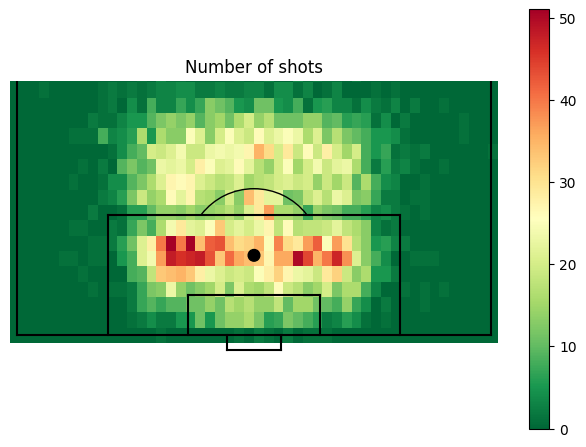

In [15]:
#Two dimensional histogram
H_Shot=np.histogram2d(shots_model['X'], shots_model['Y'],bins=50,range=[[0, 100],[0, 100]])
goals_only=shots_model[shots_model['Goal']==1]
H_Goal=np.histogram2d(goals_only['X'], goals_only['Y'],bins=50,range=[[0, 100],[0, 100]])



#Plot the number of shots from different points
(fig,ax) = createGoalMouth()
pos=ax.imshow(H_Shot[0], extent=[-1,66,104,-1], aspect='auto',cmap=plt.cm.RdYlGn_r)
fig.colorbar(pos, ax=ax)
ax.set_title('Number of shots')
plt.xlim((-1,66))
plt.ylim((-3,35))
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

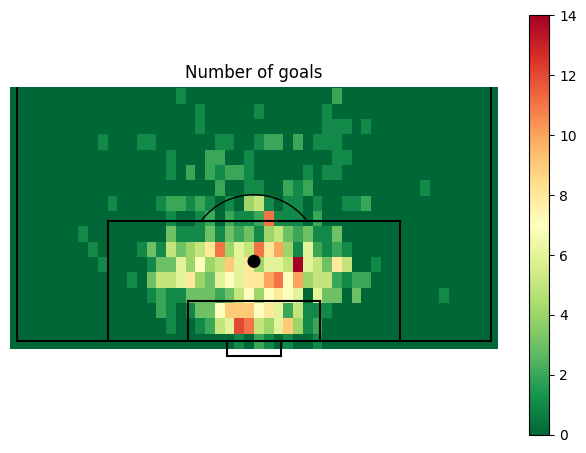

In [16]:
#Plot the number of GOALS from different points
(fig,ax) = createGoalMouth()
pos=ax.imshow(H_Goal[0], extent=[-1,66,104,-1], aspect='auto',cmap=plt.cm.RdYlGn_r)
fig.colorbar(pos, ax=ax)
ax.set_title('Number of goals')
plt.xlim((-1,66))
plt.ylim((-3,35))
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
#fig.savefig('/kaggle/working/NumberOfGoals.pdf', dpi=None, bbox_inches="tight") 

/var/folders/ch/rtlgfpts12v22kcr_b8ncvqr0000gn/T/ipykernel_58851/434275583.py:3: RuntimeWarning: invalid value encountered in divide
  pos=ax.imshow(H_Goal[0]/H_Shot[0], extent=[-1,66,104,-1], aspect='auto',cmap=plt.cm.RdYlGn_r,vmin=0, vmax=0.5)


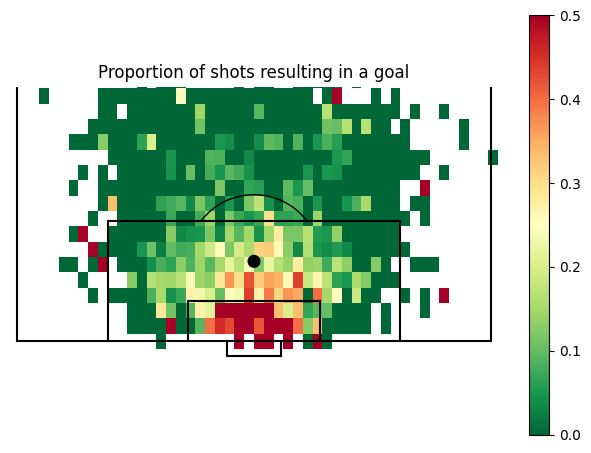

In [17]:
#Plot the probability of scoring from different points
(fig,ax) = createGoalMouth()
pos=ax.imshow(H_Goal[0]/H_Shot[0], extent=[-1,66,104,-1], aspect='auto',cmap=plt.cm.RdYlGn_r,vmin=0, vmax=0.5)
fig.colorbar(pos, ax=ax)
ax.set_title('Proportion of shots resulting in a goal')
plt.xlim((-1,66))
plt.ylim((-3,35))
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

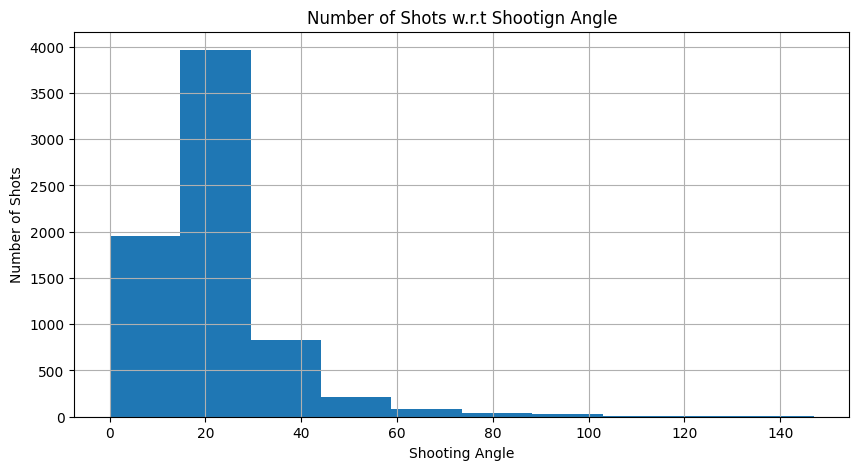

In [18]:
# Let us see a histogram of shots frequency from different angles
fig,ax = plt.subplots(figsize = (10,5))
shots_model.hist('Angle', ax = ax)

plt.title('Number of Shots w.r.t Shootign Angle')
plt.xlabel('Shooting Angle')
plt.ylabel('Number of Shots')
plt.show()

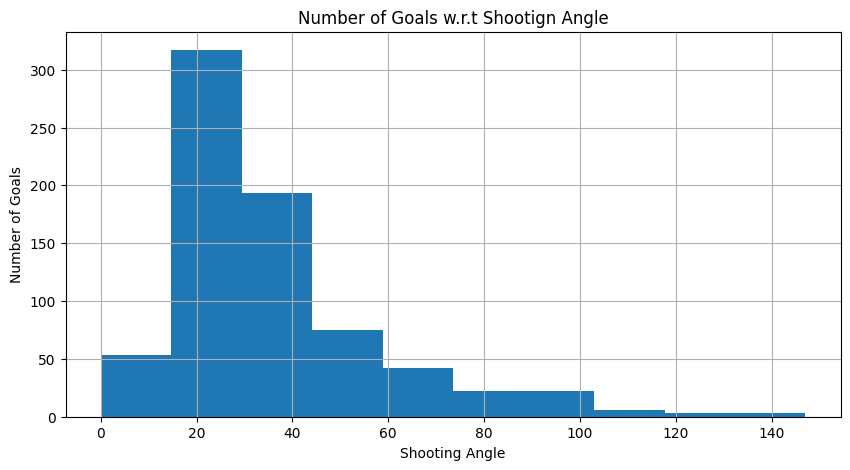

In [19]:
fig,ax = plt.subplots(figsize = (10,5))
shots_model[shots_model['Goal']== 1].hist('Angle', ax = ax)
plt.title('Number of Goals w.r.t Shootign Angle')
plt.xlabel('Shooting Angle')
plt.ylabel('Number of Goals')
plt.show()

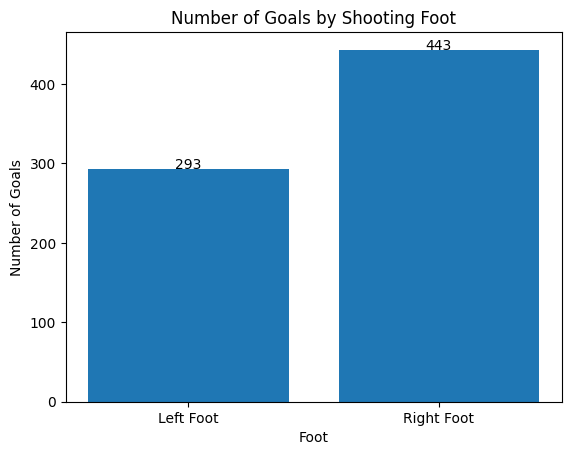

In [20]:
# Creating a mask to filter out all the goals
mask = shots_model[shots_model['Goal']== 1]

# Count the number of goals scored by left foot and right foot
left_foot_goals = mask['Left_Foot'].sum()
right_foot_goals = mask['Right_Foot'].sum()

# Plot the results
labels = ['Left Foot', 'Right Foot']
values = [left_foot_goals, right_foot_goals]
plt.bar(labels, values)
plt.title('Number of Goals by Shooting Foot')
plt.xlabel('Foot')
plt.ylabel('Number of Goals')

# Add text labels to the bars
for i, v in enumerate(values):
    plt.text(i, v + 0.25, str(v), color='black', ha='center')
    
plt.show()

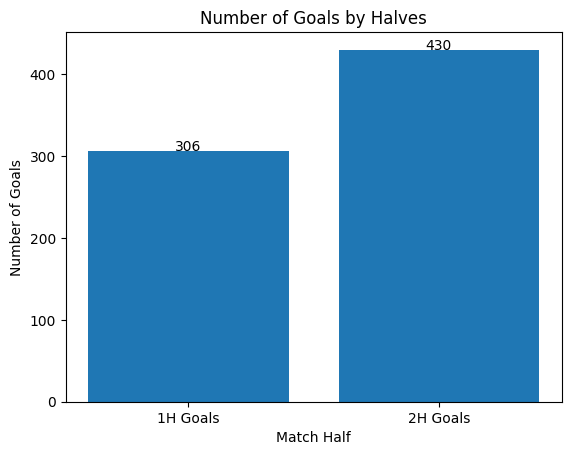

In [21]:
# Creating a mask to filter out all the goals
mask = shots_model[shots_model['Goal']== 1]

# Count the number of goals scored by left foot and right foot
FH_goals = mask['1H'].sum()
SH_goals = mask['2H'].sum()

# Plot the results
labels = ['1H Goals', '2H Goals']
values = [FH_goals, SH_goals]

plt.bar(labels, values)
plt.title('Number of Goals by Halves')
plt.xlabel('Match Half')
plt.ylabel('Number of Goals')

# Add text labels to the bars
for i, v in enumerate(values):
    plt.text(i, v + 0.25, str(v), color='black', ha='center')
plt.show()

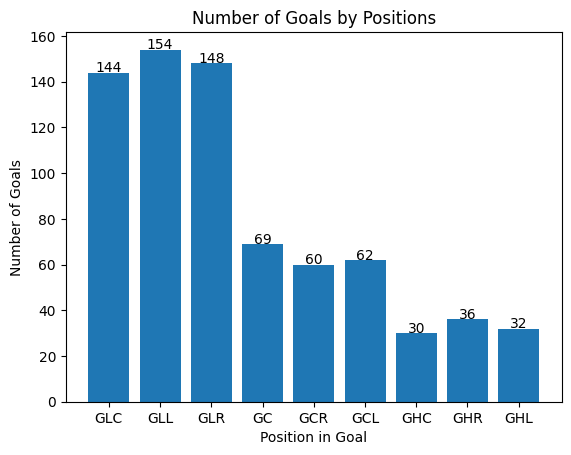

In [22]:
# Creating a mask to filter out all the goals
mask = shots_model[shots_model['Goal']== 1]

# Count the number of goals scored from different posittions
glc_goals = mask['GLC'].sum()
gll_goals = mask['GLL'].sum()
glr_goals = mask['GLR'].sum()
gc_goals  = mask['GC'].sum()
gcr_goals = mask['GCR'].sum()
gcl_goals = mask['GCL'].sum()
ghc_goals = mask['GHC'].sum()
ghr_goals = mask['GHR'].sum()
ghl_goals = mask['GHL'].sum()
# Plot the results
labels = ['GLC', 'GLL','GLR','GC','GCR','GCL','GHC','GHR','GHL']
values = [glc_goals, gll_goals, glr_goals,gc_goals,gcr_goals,gcl_goals,ghc_goals,ghr_goals,ghl_goals]

plt.bar(labels, values)
plt.title('Number of Goals by Positions')
plt.xlabel('Position in Goal')
plt.ylabel('Number of Goals')

# Add text labels to the bars
for i, v in enumerate(values):
    plt.text(i, v + 0.25, str(v), color='black', ha='center')
    
plt.show()

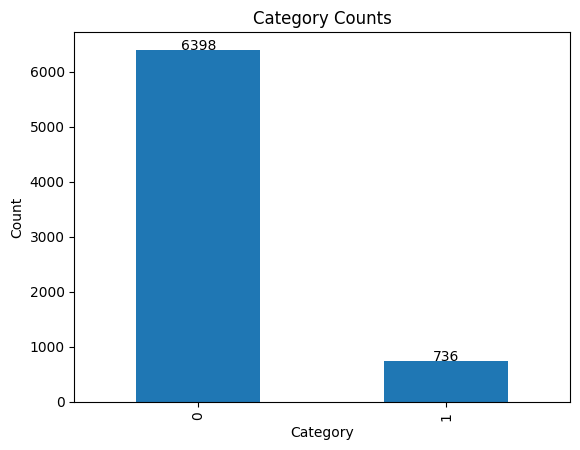

In [23]:
# Get the counts of each category
counts = shots_model['Goal'].value_counts()

# Create a bar plot
counts.plot.bar()

# Set the title and axis labels
plt.title('Category Counts')
plt.xlabel('Category')
plt.ylabel('Count')

# Add text labels to the bars
for i, v in enumerate(counts):
    plt.text(i, v + 0.25, str(v), color='black', ha='center')
# Display the plot
plt.show()

### Checking for Multi-Collinearity in Data Using VIF Statistic

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
features = shots_model[['X','Y','C','Left_Foot','Right_Foot','GLC', 'GLR', 'GLL', 'GC', 'GCR', 'GCL', 'GHC', 'GHR','GHL','1H', '2H','Distance', 'Angle']]
vif_data = pd.DataFrame()
vif_data["feature"] = features.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(features.values, i)
                          for i in range(len(features.columns))]

pd.options.display.float_format = '{:.4f}'.format
vif_data


/opt/homebrew/anaconda3/envs/data-ltv-prediction/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,X,70.6069
1,Y,1.0261
2,C,6.5567
3,Left_Foot,inf
4,Right_Foot,inf
5,GLC,1.0741
6,GLR,1.0500
7,GLL,1.0426
8,GC,1.0411
9,GCR,1.0263


### Dealing with Infinity Values
We are getting the value "inf" (infinity) for 4 columns. Left_Foot, Right_Foot, 1H and 2H. This shows a perfect correlation between two independent variables. In the case of perfect correlation, we get R2 =1, which lead to 1/(1-R2) infinity. To solve this problem we need to drop one of the variables from the dataset which is causing this perfect multicollinearity. This also understandable since we always inlcude n-1 dummy variables for any categorical variable. Right_Foot class 0 represents Left_Foot, similiarly 1H class 0 represents 2H. Therefore, we will drop 1H and Left_Foot from our dataframe.

Dealing with VIF Scores > 10
X cooridinate and Distance are highly multicollinear, So we will be dropping X from our final dataset.

In [25]:
features = shots_model[['Y','C','Right_Foot','GLC', 'GLR', 'GLL', 'GC', 'GCR', 'GCL', 'GHC', 'GHR','GHL', '2H','Distance', 'Angle']]
vif_data = pd.DataFrame()
vif_data["feature"] = features.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(features.values, i)
                          for i in range(len(features.columns))]

pd.options.display.float_format = '{:.4f}'.format
vif_data

,feature,VIF
0,Y,10.3955
1,C,3.8207
2,Right_Foot,2.5931
3,GLC,1.1932
4,GLR,1.1002
5,GLL,1.0999
6,GC,1.0976
7,GCR,1.0508
8,GCL,1.0436
9,GHC,1.0267


In [26]:
# Since VIF score for Y coordinate is aprox 10 so we also drop this feature. This will completely remove any trace of multi-collinearity from our data set
features = shots_model[['C','Right_Foot','GLC', 'GLR', 'GLL', 'GC', 'GCR', 'GCL', 'GHC', 'GHR','GHL', '2H','Distance', 'Angle']]
vif_data = pd.DataFrame()
vif_data["feature"] = features.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(features.values, i)
                          for i in range(len(features.columns))]

pd.options.display.float_format = '{:.4f}'.format
vif_data

,feature,VIF
0,C,3.7177
1,Right_Foot,2.5361
2,GLC,1.1921
3,GLR,1.0920
4,GLL,1.0999
5,GC,1.0976
6,GCR,1.0465
7,GCL,1.0436
8,GHC,1.0267
9,GHR,1.0136


### Train Test Split and Cross Validation

In [26]:
# Creating a dataframe containing all the features
X = shots_model[['C','Right_Foot','GLC', 'GLR', 'GLL', 'GC', 'GCR', 'GCL', 'GHC', 'GHR','GHL', '2H','Distance','Angle']]
# Feature data set
X

,C,Right_Foot,GLC,GLR,GLL,GC,GCR,GCL,GHC,GHR,GHL,2H,Distance,Angle
0,9.0000,1,0,0,1,0,0,0,0,0,0,0,13.8918,27.1841
1,2.0000,0,0,0,0,0,0,0,0,0,0,0,15.8036,26.0022
2,17.0000,0,0,0,0,0,0,0,0,0,0,0,22.8058,16.0770
3,20.0000,1,0,0,1,0,0,0,0,0,0,0,29.2927,12.8159
4,11.0000,0,0,0,0,0,0,0,0,0,0,0,12.7032,27.4476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7129,10.0000,0,0,0,0,0,0,0,0,0,0,1,16.0730,23.7159
7130,5.0000,0,0,0,0,0,0,0,0,0,0,1,29.5791,14.0254
7131,17.0000,1,0,0,0,0,0,0,0,1,0,1,18.3900,18.3298
7132,12.0000,1,1,0,0,0,0,0,0,0,0,1,14.8189,24.0982


In [27]:
# Scaling the numeric continous features in our data set
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_continuous = X[['C', 'Distance', 'Angle']] # select only continuous columns
X_scaled = scaler.fit_transform(X_continuous)

X_scaled

array([[-0.38302119, -0.73244049,  0.39559958],
       [-1.31688077, -0.48550646,  0.30511596],
       [ 0.68424691,  0.41895176, -0.45472857],
       ...,
       [ 0.68424691, -0.15142289, -0.28225801],
       [ 0.01720435, -0.6126909 ,  0.15935494],
       [ 0.01720435, -1.04616467,  0.42150606]])

In [28]:
# Dropping the original continuous columns in the dataframe
X = X.drop(['C','Angle','Distance'], axis=1)

# Adding scaled columns to our dataset
X['C'] = X_scaled[:,0]
X['Distance'] = X_scaled[:,1]
X['Angle'] = X_scaled[:,2]

# Finalized Feature Dataset
X

,Right_Foot,GLC,GLR,GLL,GC,GCR,GCL,GHC,GHR,GHL,2H,C,Distance,Angle
0,1,0,0,1,0,0,0,0,0,0,0,-0.3830,-0.7324,0.3956
1,0,0,0,0,0,0,0,0,0,0,0,-1.3169,-0.4855,0.3051
2,0,0,0,0,0,0,0,0,0,0,0,0.6842,0.4190,-0.4547
3,1,0,0,1,0,0,0,0,0,0,0,1.0845,1.2568,-0.7044
4,0,0,0,0,0,0,0,0,0,0,0,-0.1162,-0.8860,0.4158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7129,0,0,0,0,0,0,0,0,0,0,1,-0.2496,-0.4507,0.1301
7130,0,0,0,0,0,0,0,0,0,0,1,-0.9167,1.2938,-0.6118
7131,1,0,0,0,0,0,0,0,1,0,1,0.6842,-0.1514,-0.2823
7132,1,1,0,0,0,0,0,0,0,0,1,0.0172,-0.6127,0.1594


In [29]:
# Creating a data set containing dependent variable 'Goal'
y = shots_model['Goal']

y

0       1
1       0
2       0
3       0
4       0
       ..
7129    0
7130    0
7131    1
7132    0
7133    0
Name: Goal, Length: 7134, dtype: int64

### Nested Cross-Validation¶
We first split the data into training and testing sets using train_test_split() and then use cross-validation on the training set to fine-tune the model's hyperparameters and estimate its performance. In nested cross-validation, the outer loop performs the train-test split and the inner loop performs cross-validation on the training set. The inner loop is used to search for the best hyperparameters for the model, while the outer loop is used to estimate the performance of the model on new data.

For imbalanced class data, it is generally recommended to use stratified cross-validation, which ensures that each fold has the same proportion of samples from each class as the entire dataset. This can help to ensure that the model is able to learn from examples of the minority class and improve its performance on predicting the minority class. Stratified k-fold cross-validation is a common method for this, where the data is divided into k folds and each fold has roughly the same proportion of samples from each class.

## First Approach Logistic Regression

In [30]:
# Importing the libraries required for logistci regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score

In [31]:
# Loading required libraries
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score

In [32]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [33]:
# Determine scale_pos_weight based on class imbalance
count_class_0, count_class_1 = y_train.value_counts()
print ('Shot in Training Data: ', count_class_0)
print ('Goals in Training Data: ', count_class_1)

Shot in Training Data:  4789
Goals in Training Data:  561


In [34]:
# Class imbalance in training data
weight_0 = count_class_0 / (count_class_0 + count_class_1)
weight_1 = count_class_1 / (count_class_0 + count_class_1)
print ('Weight of Shots Class in Training: ',weight_0)
print ('Weight of Goal Class in Training: ', weight_1)

Weight of Shots Class in Training:  0.8951401869158878
Weight of Goal Class in Training:  0.10485981308411214


In [35]:
# Defining the hyperparameters to tune
# dictionary param_grid specifies the hyperparameters to tune for the logistic regression model. 
# The C parameter is the inverse of the regularization strength, penalty specifies the type of regularization to apply, and class_weight specifies
# how to handle class imbalance.
param_grid_lr = {'C': [0.1, 1, 10, 100],
              'penalty': ['l1', 'l2'],
              'class_weight': ['balanced', {0:weight_0, 1:weight_1}]}

In [36]:
# Defining the outer loop for train-test split
# This code defines the outer loop for cross-validation using StratifiedKFold(). 
# n_splits is the number of folds to use, and shuffle is whether or not to shuffle the data before splitting

cv_outer = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [37]:
# Defining the inner loop for cross-validation on the training set
# This loop will be used to perform cross-validation on the training set for each combination of hyperparameters.
cv_inner = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [38]:
# Defining the logistic regression model
lr_model = LogisticRegression()

We will now perform nested cross-validation using GridSearchCV() with the logistic regression model, the hyperparameter grid, the inner loop, and the F1 score as the performance metric. cross_val_score() is then used to calculate the F1 score of each fold in the outer loop.

The F-score is a way of combining the precision and recall of the model, and it is defined as the harmonic mean of the model’s precision and recall.

In [39]:
# Starting the tiemr
start_time = time.time()

# Perform nested cross-validation with grid search

grid = GridSearchCV(lr_model, param_grid=param_grid_lr, cv=cv_inner, scoring='f1', n_jobs=-1)
scores = cross_val_score(grid, X_train, y_train, cv=cv_outer, scoring='f1', n_jobs=-1)

# the array of F1-scores obtained by performing cross-validation on the training set using the GridSearchCV object
scores

/opt/homebrew/anaconda3/envs/data-ltv-prediction/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/anaconda3/envs/data-ltv-prediction/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/anaconda3/envs/data-ltv-prediction/lib/python3.11/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/h

array([0.54986523, 0.5       , 0.50234742, 0.55555556, 0.51707317])

In [40]:
# Fitting the best model on the entire training set
grid.fit(X_train, y_train)
best_lr_model = grid.best_estimator_

# Stopping the tiemr
end_time = time.time()

lr_training_time = end_time - start_time

/opt/homebrew/anaconda3/envs/data-ltv-prediction/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/anaconda3/envs/data-ltv-prediction/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/anaconda3/envs/data-ltv-prediction/lib/python3.11/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/h

In [41]:
# Print the best parameters and training time
print("Best parameters: ", grid.best_params_)
print ("Model Training Time: {:.3f} seconds".format(lr_training_time))

Best parameters:  {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2'}
Model Training Time: 78.804 seconds


In [44]:
#from tabulate import tabulate
from scipy.stats import norm

In [46]:
# Model Summary
# Get the estimated coefficients
coef = best_lr_model.coef_[0]
intercept = best_lr_model.intercept_[0]

# Calculate the standard errors
n = len(y_train)
A = np.hstack((np.ones((n, 1)), X_train))
p = len(coef)
y_pred = best_lr_model.predict(X_train)
residuals = y_train - y_pred
sigma2 = np.sum(residuals**2) / (n - p - 1)
cov = sigma2 * np.linalg.inv(np.dot(A.T, A))
se = np.sqrt(np.diag(cov)[1:])

# Calculate the Wald statistics and p-values
wald = coef / se
p_values = (1 - norm.cdf(np.abs(wald))) * 2

features = list(X_train.columns)

# Create a summary table of coefficients, standard errors, Wald statistics, and p-values
table = np.column_stack((features, coef, se, wald, p_values))
headers = ['Feature', 'Coef.', 'Std. Err.', 'Wald', 'p-value']
#print(tabulate(table, headers=headers))

Text(0.5, 1.0, 'Confusion Matrix - Train Set')

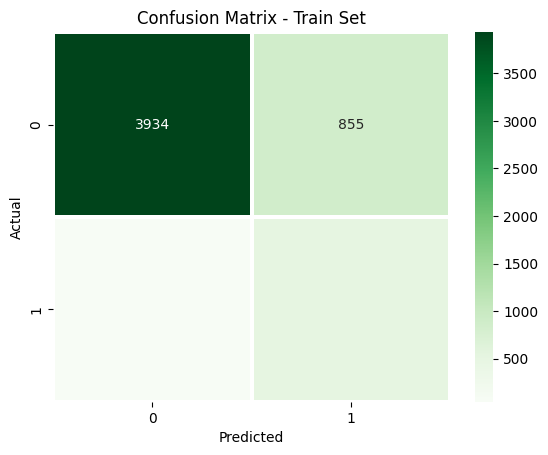

In [47]:
# Confusion Matrix for Training Data
cm_train = confusion_matrix(y_train, best_lr_model.predict(X_train))

ax = sns.heatmap(cm_train, annot=True, cmap='Greens', fmt='g', linewidth=1.5)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix - Train Set')

In [48]:
# Classfication report for training data
print (classification_report(y_train, best_lr_model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.99      0.82      0.90      4789
           1       0.38      0.92      0.53       561

    accuracy                           0.83      5350
   macro avg       0.68      0.87      0.71      5350
weighted avg       0.92      0.83      0.86      5350



Text(0.5, 1.0, 'Confusion Matrix - Test Set')

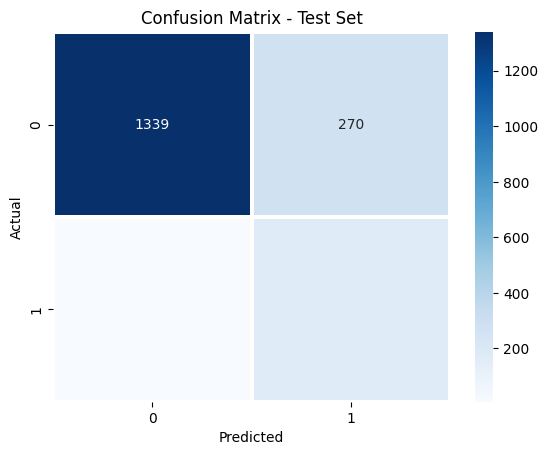

In [49]:
# Evaluate the performance of the best model on the testing set
y_pred = best_lr_model.predict(X_test)

# Confusion Matrix for Testig Data
cm_test = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(cm_test, annot=True, cmap='Blues', fmt='g', linewidth=1.5)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix - Test Set')

In [50]:
# Classfication report for training data
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.83      0.91      1609
           1       0.38      0.95      0.55       175

    accuracy                           0.84      1784
   macro avg       0.69      0.89      0.73      1784
weighted avg       0.93      0.84      0.87      1784

